In [163]:
import numpy 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn import metrics
#from sklearn.model_selection import train_test_split

#model metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, auc

#cross validation
from sklearn.model_selection import train_test_split

In [175]:
titanic_train = pd.read_csv("C:/Users/Siva/Documents/Certificate in Data Science UT Texas/Data Science with Python/CapStone Project/train.csv")

In [176]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [177]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [178]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

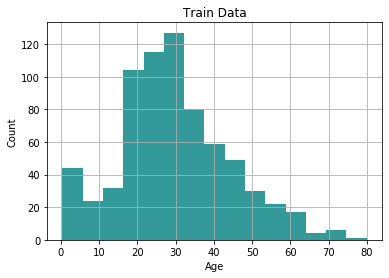

In [179]:
ax = titanic_train.Age.hist(bins=15, color='teal', alpha=0.8)
ax.set(xlabel='Age', ylabel='Count', title='Train Data')
plt.show()

In [180]:
titanic_train.Age.median(skipna=True) 

28.0

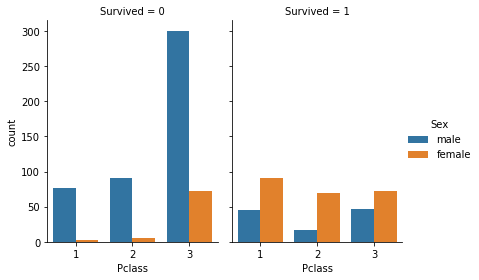

In [181]:
ax = sns.catplot(x="Pclass", hue="Sex", col="Survived", data=titanic_train, kind="count", height=4, aspect=.7);

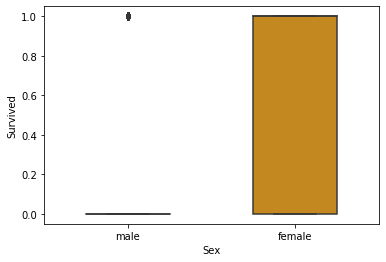

In [182]:
sns.boxplot(y="Survived",x="Sex",data=titanic_train,width=0.5,palette="colorblind") 

In [183]:
corrMat = titanic_train.corr() 
print(corrMat)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [184]:
covMat = titanic_train.cov()
print(covMat)

              PassengerId  Survived     Pclass         Age      SibSp  \
PassengerId  66231.000000 -0.626966  -7.561798  138.696504 -16.325843   
Survived        -0.626966  0.236772  -0.137703   -0.551296  -0.018954   
Pclass          -7.561798 -0.137703   0.699015   -4.496004   0.076599   
Age            138.696504 -0.551296  -4.496004  211.019125  -4.163334   
SibSp          -16.325843 -0.018954   0.076599   -4.163334   1.216043   
Parch           -0.342697  0.032017   0.012429   -2.344191   0.368739   
Fare           161.883369  6.221787 -22.830196   73.849030   8.748734   

                Parch         Fare  
PassengerId -0.342697   161.883369  
Survived     0.032017     6.221787  
Pclass       0.012429   -22.830196  
Age         -2.344191    73.849030  
SibSp        0.368739     8.748734  
Parch        0.649728     8.661052  
Fare         8.661052  2469.436846  


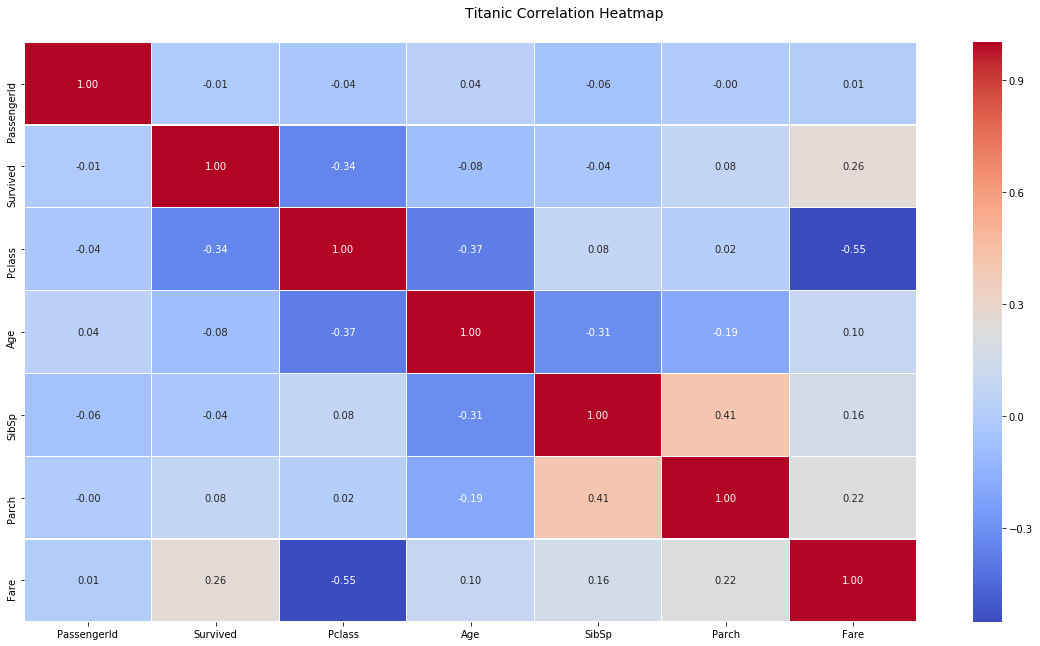

In [185]:
f, ax = plt.subplots(figsize=(20, 10))
hm = sns.heatmap(round(corrMat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Titanic Correlation Heatmap', fontsize=14)

In [186]:
df = titanic_train
df['TravellingWithBuddies']=df.SibSp+df.Parch
df['TravellingAlone']=numpy.where(df['TravellingWithBuddies']>0, 0, 1)
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)
#df.drop('TravellingWithBuddies', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,TravellingWithBuddies,TravellingAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,1


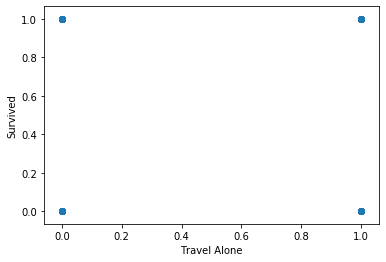

In [187]:
x = df['TravellingAlone']
y = df['Survived']
plt.xlabel("Travel Alone")
plt.ylabel("Survived")
plt.scatter(x,y)
plt.show( )

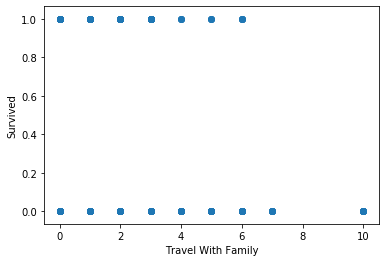

In [188]:
x = df['TravellingWithBuddies']
y = df['Survived']
plt.xlabel("Travel With Family")
plt.ylabel("Survived")
plt.scatter(x,y)
plt.show( )

In [189]:
titanic_train = pd.read_csv("C:/Users/Siva/Documents/Certificate in Data Science UT Texas/Data Science with Python/CapStone Project/train.csv")
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [190]:
titanic_train.Age.fillna(28, inplace=True)
titanic_train.Embarked.fillna("S", inplace=True)
titanic_train.drop('Cabin', axis=1, inplace=True)

In [191]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [192]:
titanic_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [193]:
data_features = ["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare"]
response = ["Survived"]

C:\Users\Siva\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Siva\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Siva\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


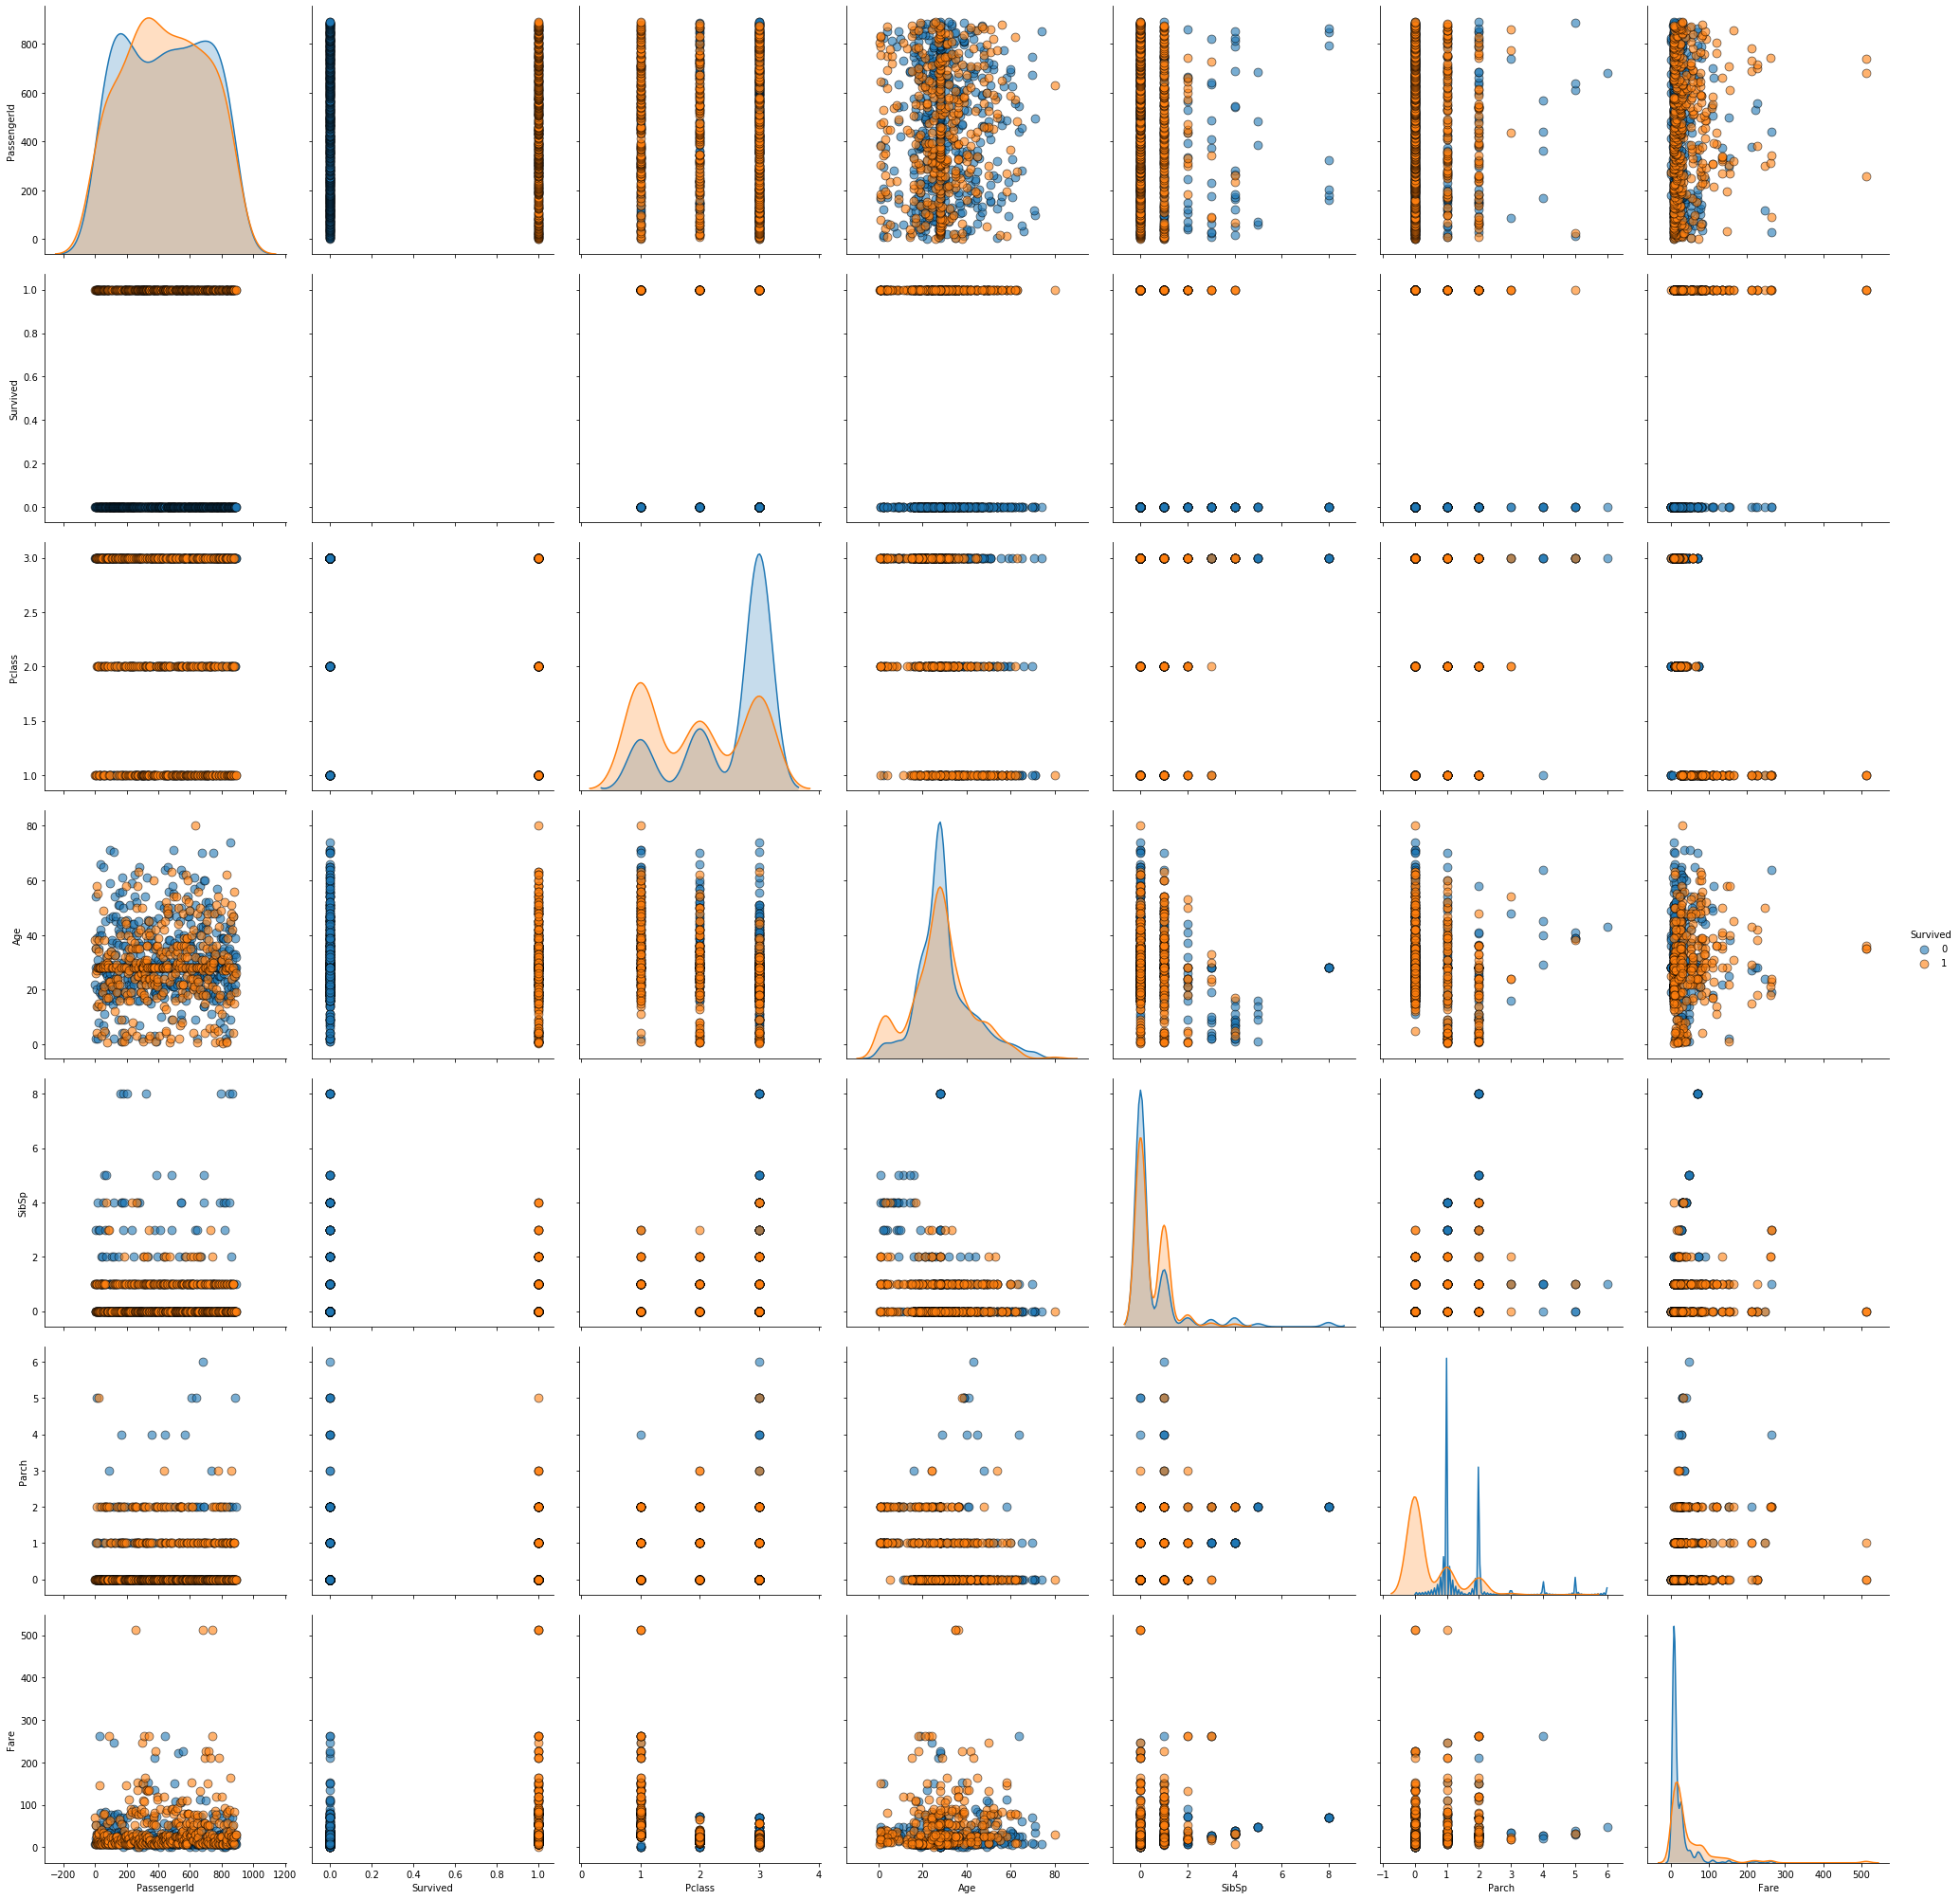

In [194]:
# Create a pair plot colored by Survived with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(titanic_train, hue='Survived',diag_kind = 'kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4)

In [195]:
titanic_train['Sex'] = titanic_train['Sex'].replace({'male':'1','female':'2'})
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


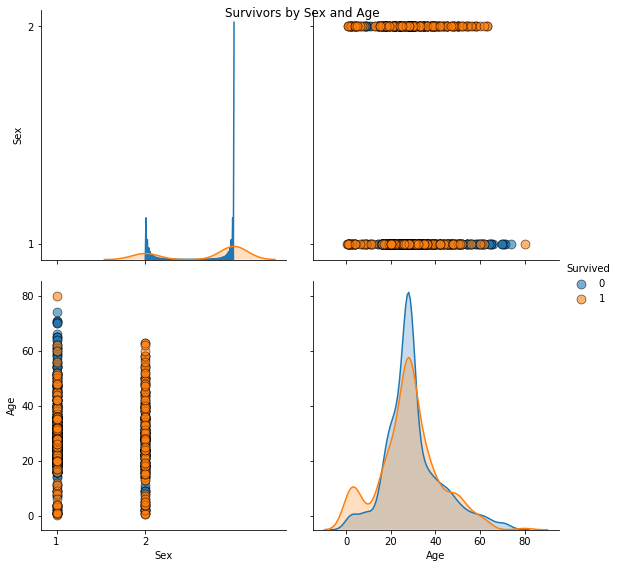

In [196]:
# Plot colored by survived  
sns.pairplot(titanic_train, 
             vars = ['Sex', 'Age'], 
             hue = 'Survived', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);
# Title 
plt.suptitle('Survivors by Sex and Age', 
             size = 12);

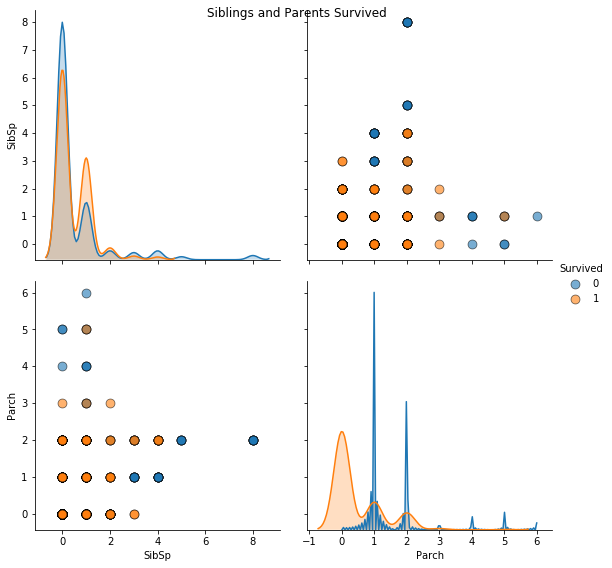

In [197]:
sns.pairplot(titanic_train, 
             vars = ['SibSp', 'Parch'], 
             hue = 'Survived', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);
# Title 
plt.suptitle('Siblings and Parents Survived', 
             size = 12);

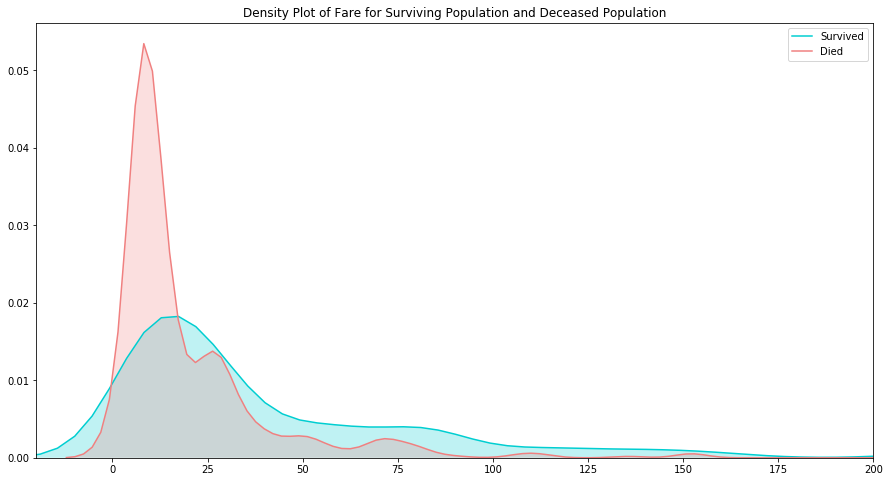

In [198]:
plt.figure(figsize=(15,8))
sns.kdeplot(titanic_train["Fare"][titanic_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(titanic_train["Fare"][titanic_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
# limit x axis to zoom on most information. there are a few outliers in fare. 
plt.xlim(-20,200)
plt.show()

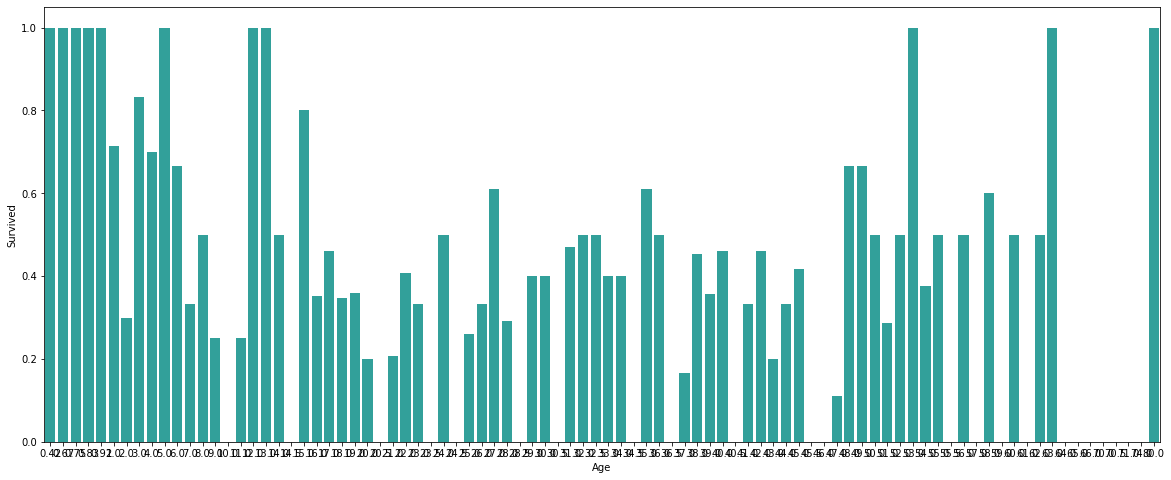

In [243]:
plt.figure(figsize=(20,8))
avg_survival_byage = titanic_train[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")

In [199]:
#Correlation Matrix
corrMat = titanic_train.corr() 
print(corrMat)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096688  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [200]:
#Coveriance 
covMat = titanic_train.cov()
print(covMat)

              PassengerId  Survived     Pclass         Age      SibSp  \
PassengerId  66231.000000 -0.626966  -7.561798  114.633461 -16.325843   
Survived        -0.626966  0.236772  -0.137703   -0.411226  -0.018954   
Pclass          -7.561798 -0.137703   0.699015   -3.699927   0.076599   
Age            114.633461 -0.411226  -3.699927  169.512498  -3.349525   
SibSp          -16.325843 -0.018954   0.076599   -3.349525   1.216043   
Parch           -0.342697  0.032017   0.012429   -1.810133   0.368739   
Fare           161.883369  6.221787 -22.830196   62.556767   8.748734   

                Parch         Fare  
PassengerId -0.342697   161.883369  
Survived     0.032017     6.221787  
Pclass       0.012429   -22.830196  
Age         -1.810133    62.556767  
SibSp        0.368739     8.748734  
Parch        0.649728     8.661052  
Fare         8.661052  2469.436846  


[Text(0.5, 1, 'Correlation')]

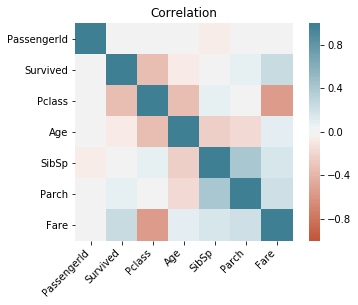

In [201]:
ax = sns.heatmap(
    corrMat, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set(title='Correlation')

[Text(0.5, 1, 'Covariance')]

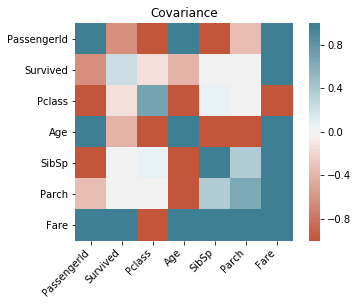

In [202]:
ax = sns.heatmap(
    covMat, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set(title='Covariance')

In [203]:
train, test = train_test_split(titanic_train, test_size=0.2)
train_features = train[data_features]
train_depVar = train[response] 
test_features = test[data_features]
test_depVar = test[response]
  
train_features.Sex = train_features.Sex.astype(numpy.int64)
train_features.Age = train_features.Age.astype(numpy.int64)
test_features.Sex = test_features.Sex.astype(numpy.int64)
test_features.Age = test_features.Age.astype(numpy.int64)

C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [206]:
#Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(train_features, train_depVar)
print(cross_val_score(logreg, train_features, train_depVar)) 
logreg.score(train_features, train_depVar) 

[0.78571429 0.76890756 0.78389831]


C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:

0.7837078651685393

In [207]:
##Make Predictions - LogisticRegression
test_features.Sex = pd.to_numeric(test_features.Sex)
test_features.Age = pd.to_numeric(test_features.Age)
predictions_logreg = logreg.predict(test_features)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_features, test_depVar)))

Accuracy of logistic regression classifier on test set: 0.82


C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [208]:
# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(test_depVar, logreg.predict_proba(test_features)[:,1])
# Calculate the AUC
roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )

ROC AUC: 0.874


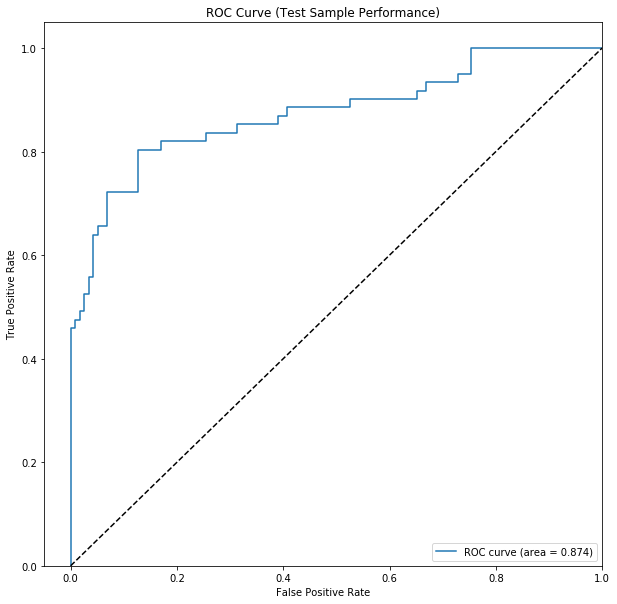

In [209]:
# Plot of a ROC curve
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Sample Performance)')
plt.legend(loc="lower right")
plt.show()

In [210]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_features, train_depVar)
print(cross_val_score(random_forest, train_features, train_depVar)) 
random_forest.score(train_features, train_depVar)

C:\Users\Siva\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:514: DataConversionW

[0.83193277 0.82773109 0.82627119]


C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


1.0

In [211]:
##Make Predictions - Random Forest
Predict_RF = random_forest.predict(test_features)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(random_forest.score(test_features, test_depVar)))

Accuracy of random forest classifier on test set: 0.87


In [212]:
# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(test_depVar, random_forest.predict_proba(test_features)[:,1])
# Calculate the AUC
roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )

ROC AUC: 0.869


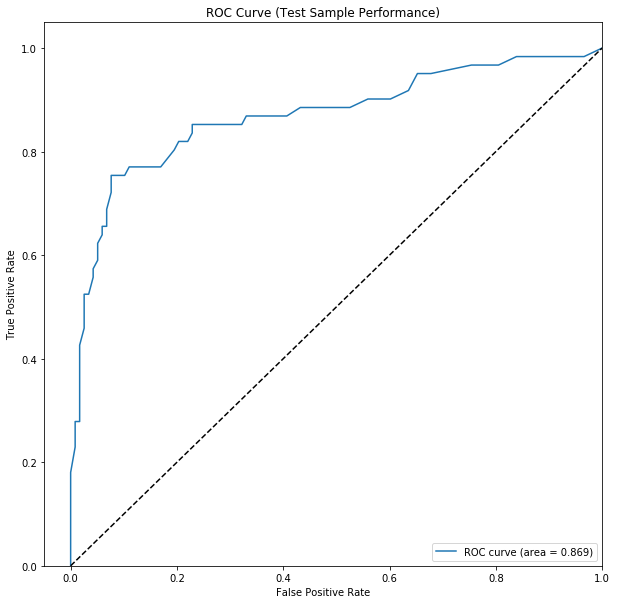

In [213]:
# Plot of a ROC curve
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Sample Performance)')
plt.legend(loc="lower right")
plt.show()

In [214]:
#Nearest Neighbors
ModelNeighbors = KNeighborsClassifier(n_neighbors=10)
ModelNeighbors.fit(train_features,train_depVar)
print(cross_val_score(ModelNeighbors, train_features, train_depVar)) 
ModelNeighbors.score(train_features,train_depVar)


[0.59663866 0.6092437  0.64830508]


C:\Users\Siva\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:514: DataConversio

0.6896067415730337

In [215]:
#Make Predictions - Nearest Neighbors
predictions_Neighbors = ModelNeighbors.predict(test_features)   
print('Accuracy of Nearest Neighbors classifier on test set: {:.2f}'.format(ModelNeighbors.score(test_features, test_depVar)))

Accuracy of Nearest Neighbors classifier on test set: 0.66


In [216]:
#SVC Model
ModelSVC = SVC(gamma='auto')
ModelSVC.fit(train_features,train_depVar) 
print(cross_val_score(ModelSVC, train_features, train_depVar)) 
ModelSVC.score(train_features,train_depVar)

[0.60504202 0.60084034 0.60169492]


C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Siva\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was e

1.0

In [217]:
#Make Predictions - SVC
predictions_SVC = ModelSVC.predict(test_features)
print('Accuracy of SVC classifier on test set: {:.2f}'.format(ModelSVC.score(test_features, test_depVar)))

Accuracy of SVC classifier on test set: 0.64


In [218]:
print("=== Confusion Matrix Random Forest ===")
print(confusion_matrix(test_depVar, Predict_RF))
print('\n')

=== Confusion Matrix Random Forest ===
[[109   9]
 [ 15  46]]




In [219]:
print("=== Classification Report  Random Forest ===")
print(classification_report(test_depVar, Predict_RF))
print('\n')

=== Classification Report  Random Forest ===
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       118
           1       0.84      0.75      0.79        61

    accuracy                           0.87       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.87      0.86       179





In [221]:
#important features
RFfeature_imp = pd.Series(random_forest.feature_importances_,index=test_features.columns).sort_values(ascending=False)
RFfeature_imp

Sex            0.231585
Fare           0.216356
PassengerId    0.213966
Age            0.185068
Pclass         0.076335
SibSp          0.042145
Parch          0.034546
dtype: float64

No handles with labels found to put in legend.


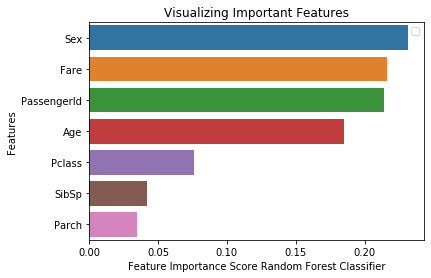

In [222]:
# Creating a bar plot
sns.barplot(x=RFfeature_imp, y=RFfeature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score Random Forest Classifier')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [238]:
titanic_test = pd.read_csv("C:/Users/Siva/Documents/Certificate in Data Science UT Texas/Data Science with Python/CapStone Project/test.csv")

In [239]:
titanic_test['Sex'] = titanic_test['Sex'].replace({'male':'1','female':'2'}) 
titanic_test["Age"].fillna(28, inplace=True)
titanic_test["Fare"].fillna(14.45, inplace=True)
titanic_test.drop('Cabin', axis=1, inplace=True)

In [240]:
titanic_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [241]:
final_test_RF = titanic_test[data_features]
final_prediction = random_forest.predict(final_test_RF)
final_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [242]:
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": final_prediction
    })
submission.to_csv('titanic.csv', index=False)